In [1]:
try:
  import jax
except:
  %pip install -qq jax
  import jax

try:
  import distrax
except:
  %pip install -qq distrax
  import distrax

try:
  import matplotlib.pyplot as plt
except:
  %pip install -qq matplotlib.pyplot
  import matplotlib.pyplot as plt

try:
  from ssm import first_state, next_state, out, hmm
except:
  %pip install -qq git+https://github.com/dhruvpatel144/ssm.git
  from ssm import first_state, next_state, out, hmm





    




     |████████████████████████████████| 272 kB 16.0 MB/s 
     |████████████████████████████████| 72 kB 549 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 6.2 MB/s 
     |████████████████████████████████| 1.1 MB 40.3 MB/s 


In [2]:
l = 100  # length of chain
n = 1  # number of samples
k = 2  # number of states in sample
p = 6  # possible outcomes
pi = jax.numpy.array([0.67, 0.33])  # prior matrix of k
A = jax.numpy.array([[0.4, 0.6], [0.1, 0.9]])  # transition matrix of k*k
B = jax.numpy.array(
    [[0.1666, 0.1666, 0.1666, 0.1666, 0.166, 0.166], [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]]
)  # emission matrix of k*p

In [3]:
# sequence of probabilities for the next state and and the observation (generated from a normal distribution)
key = jax.random.PRNGKey(6)
mu = 0
sigma = 0.98
observation = distrax.Uniform(mu, sigma)
x = observation.sample(seed=key, sample_shape=(l,))
print(x)


key = jax.random.PRNGKey(5)
mu = 0
sigma = 0.8
observation = distrax.Uniform(mu, sigma)
y = observation.sample(seed=key, sample_shape=(l,))


# creating an array to store the next state and outcome of that state

/usr/local/lib/python3.7/dist-packages/jax/_src/numpy/lax_numpy.py:4457: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax_internal._check_user_dtype_supported(dtype, "astype")


[0.24438399 0.06105724 0.8234651  0.4792103  0.37952307 0.39147812
 0.6487624  0.8489719  0.04129347 0.59783113 0.5038642  0.6708865
 0.29088786 0.8777615  0.90692556 0.877122   0.01961178 0.9069325
 0.6467606  0.5924094  0.34160784 0.16260992 0.3109055  0.80378664
 0.8915508  0.8553665  0.10463744 0.16595708 0.5372745  0.14448076
 0.781345   0.5619341  0.6409216  0.8503834  0.15890154 0.4812733
 0.3199057  0.5585283  0.31867984 0.57308286 0.25617245 0.7600264
 0.03514228 0.32306033 0.11209731 0.42637366 0.79613423 0.74596256
 0.496263   0.38168958 0.10315295 0.20513742 0.92052317 0.8067102
 0.3575138  0.8765251  0.21726958 0.4193319  0.37915856 0.21424533
 0.75070995 0.10408054 0.89747596 0.47833198 0.38014936 0.316727
 0.5545349  0.7219593  0.20273244 0.27969798 0.79220796 0.71622074
 0.9199505  0.34110945 0.71861726 0.76891303 0.78522396 0.6920595
 0.492987   0.41579738 0.13067122 0.69872206 0.34045127 0.7932652
 0.2358054  0.28603575 0.1427125  0.8654972  0.1234512  0.7565109
 0.88

In [4]:
for i in range(n):
    sample, outcome = hmm(A, B, pi, x, y, p, k, l)
    print(sample)
    print(outcome)

[1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1.]
[5. 4. 3. 5. 5. 5. 1. 3. 4. 5. 4. 4. 5. 1. 0. 4. 2. 5. 5. 1. 3. 0. 2. 1.
 2. 3. 1. 5. 5. 1. 4. 5. 1. 5. 5. 5. 2. 3. 5. 4. 4. 4. 2. 0. 0. 5. 5. 5.
 5. 0. 1. 5. 1. 5. 4. 5. 5. 5. 3. 5. 3. 2. 3. 3. 2. 5. 0. 4. 5. 3. 5. 5.
 0. 1. 2. 0. 2. 4. 5. 2. 5. 5. 2. 3. 5. 5. 5. 0. 0. 3. 5. 5. 0. 1. 3. 1.
 2. 5. 2. 5.]


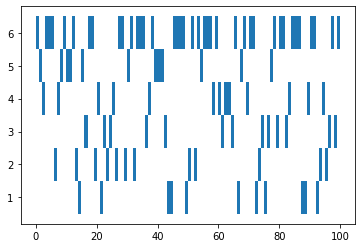

In [5]:
observed_tuple = [[] for i in range(p)]
for i in range(l):
    observed_tuple[int(outcome[i])].append(tuple([i, 1]))
for i in range(p):
    plt.broken_barh(observed_tuple[i], (i + 0.5, 1), facecolors="tab:blue")
plt.show()